# Eval of Boolean Matrix Denseblocks

In [1]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
##final
#resultsDF = pd.read_csv("../results_GreaterThan_Xor_2023_06_30_10-18-15.txt", header=1)
#resultsDF = pd.read_csv("../results_GreaterThan_Xor_2023_07_01_10-36-40.txt", header=1)
resultsDF = pd.read_csv("../results/results_GreaterThan_Xor_2023_07_01_11-41-32.txt", header=1)

##square, rlen, clen
#resultsDF = pd.read_csv("../results_GreaterThan_Xor_2023_06_29_11-05-25.txt", header=1)

In [3]:
resultsDF["numEntries"] = (resultsDF.Matrix_rlen * resultsDF.Matrix_clen)

bitsetDF, booleanDF, fp64DF = [y for x, y in resultsDF.groupby('output_type')]

runtime_DoubleBool_DF =resultsDF[(resultsDF["value_type"]=="runtime") & (resultsDF["operation"]=="DoubleToBool")]
memory_DoubleBool_DF =resultsDF[(resultsDF["value_type"]=="memory") & (resultsDF["operation"]=="DoubleToBool")]

runtime_BoolBool_DF  =resultsDF[(resultsDF["value_type"]=="runtime") & (resultsDF["operation"]=="BoolToBool")]
memory_BoolBool_DF  =resultsDF[(resultsDF["value_type"]=="memory") & (resultsDF["operation"]=="BoolToBool")]

runtime_DoubleBool_DF = runtime_DoubleBool_DF.sort_values('numEntries')
runtime_DoubleBool_DF.reset_index(drop=True, inplace=True)

memory_DoubleBool_DF = memory_DoubleBool_DF.sort_values('numEntries')
memory_DoubleBool_DF.reset_index(drop=True, inplace=True)

memory_DoubleBool_DF

,Matrix_rlen,Matrix_clen,output_type,operation,value_type,value,numEntries
0,500,100,BOOLEAN,DoubleToBool,memory,850372.8,50000
1,100,500,BOOLEAN,DoubleToBool,memory,850372.8,50000
2,500,100,FP64,DoubleToBool,memory,1200392.0,50000
3,500,100,BITSET,DoubleToBool,memory,806665.6,50000
4,100,500,BITSET,DoubleToBool,memory,806652.8,50000
...,...,...,...,...,...,...,...
64,4000,4000,BITSET,DoubleToBool,memory,260047203.2,16000000
65,4000,4000,FP64,DoubleToBool,memory,386924888.0,16000000
66,160000,100,FP64,DoubleToBool,memory,386924856.0,16000000
67,100,160000,BOOLEAN,DoubleToBool,memory,274727236.8,16000000


In [4]:
runtime_DoubleBool_DF_truncated = runtime_DoubleBool_DF
runtime_BoolBool_DF_truncated = runtime_BoolBool_DF

memory_DoubleBool_DF_truncated = memory_DoubleBool_DF
memory_BoolBool_DF_truncated = memory_BoolBool_DF

In [5]:
runtime_DoubleBool_DF_truncated_square = runtime_DoubleBool_DF_truncated[runtime_DoubleBool_DF_truncated['Matrix_rlen']==runtime_DoubleBool_DF_truncated['Matrix_clen']]
runtime_DoubleBool_DF_truncated_rlen   = runtime_DoubleBool_DF_truncated[runtime_DoubleBool_DF_truncated['Matrix_rlen']>runtime_DoubleBool_DF_truncated['Matrix_clen']]
runtime_DoubleBool_DF_truncated_clen   = runtime_DoubleBool_DF_truncated[runtime_DoubleBool_DF_truncated['Matrix_rlen']<runtime_DoubleBool_DF_truncated['Matrix_clen']]



bitsetDF_square, booleanDF_square, fp64DF_square = [y for x, y in runtime_DoubleBool_DF_truncated_square.groupby('output_type')]
bitsetDF_rlen, booleanDF_rlen, fp64DF_rlen       = [y for x, y in runtime_DoubleBool_DF_truncated_rlen.groupby('output_type')]
bitsetDF_clen, booleanDF_clen, fp64DF_clen       = [y for x, y in runtime_DoubleBool_DF_truncated_clen.groupby('output_type')]




memory_DoubleBool_DF_truncated_square = memory_DoubleBool_DF_truncated[memory_DoubleBool_DF_truncated['Matrix_rlen']==memory_DoubleBool_DF_truncated['Matrix_clen']]
memory_DoubleBool_DF_truncated_rlen   = memory_DoubleBool_DF_truncated[memory_DoubleBool_DF_truncated['Matrix_rlen']>memory_DoubleBool_DF_truncated['Matrix_clen']]
memory_DoubleBool_DF_truncated_clen   = memory_DoubleBool_DF_truncated[memory_DoubleBool_DF_truncated['Matrix_rlen']<memory_DoubleBool_DF_truncated['Matrix_clen']]


memory_bitsetDF_square, memory_booleanDF_square, memory_fp64DF_square = [y for x, y in memory_DoubleBool_DF_truncated_square.groupby('output_type')]
memory_bitsetDF_rlen, memory_booleanDF_rlen, memory_fp64DF_rlen       = [y for x, y in memory_DoubleBool_DF_truncated_rlen.groupby('output_type')]
memory_bitsetDF_clen, memory_booleanDF_clen, memory_fp64DF_clen       = [y for x, y in memory_DoubleBool_DF_truncated_clen.groupby('output_type')]




memory_bitsetDF_square

,Matrix_rlen,Matrix_clen,output_type,operation,value_type,value,numEntries
13,500,500,BITSET,DoubleToBool,memory,4224414.4,250000
26,1000,1000,BITSET,DoubleToBool,memory,16902600.0,1000000
32,2000,2000,BITSET,DoubleToBool,memory,65512096.0,4000000
39,2500,2500,BITSET,DoubleToBool,memory,101712240.0,6250000
42,3000,3000,BITSET,DoubleToBool,memory,146801008.0,9000000
53,3250,3250,BITSET,DoubleToBool,memory,171966812.8,10562500
55,3500,3500,BITSET,DoubleToBool,memory,199229788.8,12250000
59,3750,3750,BITSET,DoubleToBool,memory,228589916.8,14062500
64,4000,4000,BITSET,DoubleToBool,memory,260047203.2,16000000


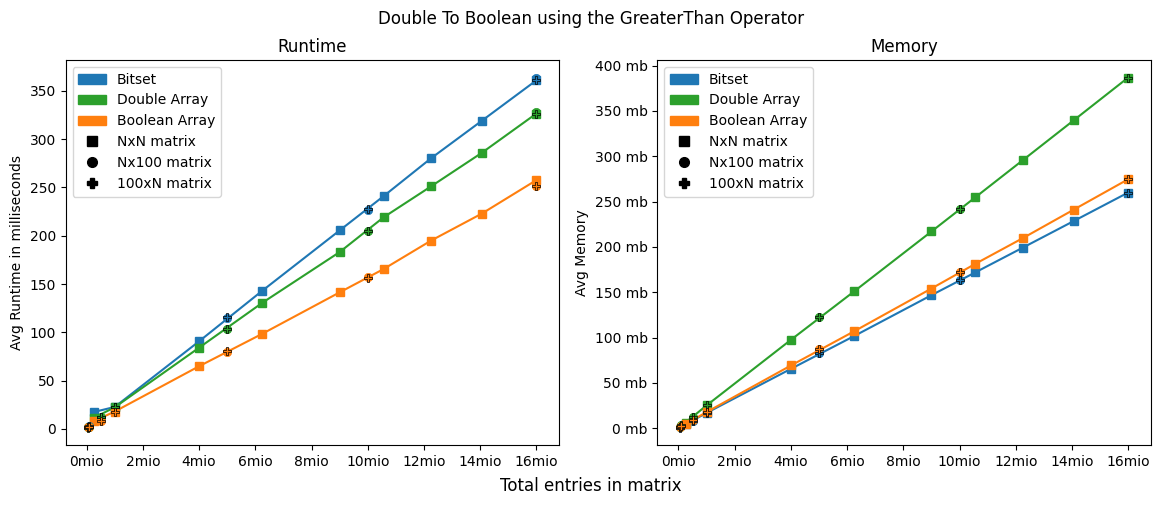

In [6]:
#plot double to bool singe plot

fig, (ax, ax_memory) = plt.subplots(1, 2, figsize=(14, 5))


ax.plot(bitsetDF_square.numEntries, bitsetDF_square.value, marker='s', color='tab:blue', label='Bitset', zorder=0)
ax.plot(fp64DF_square.numEntries, fp64DF_square.value, marker='s', color='tab:green', label='Double Array', zorder=0)
ax.plot(booleanDF_square.numEntries, booleanDF_square.value, marker='s', color='tab:orange', label='Boolean Array', zorder=0)

ax_memory.plot(memory_bitsetDF_square.numEntries, memory_bitsetDF_square.value, marker='s', color='tab:blue', label='Bitset')
ax_memory.plot(memory_fp64DF_square.numEntries, memory_fp64DF_square.value, marker='s', color='tab:green', label='Double Array')
ax_memory.plot(memory_booleanDF_square.numEntries, memory_booleanDF_square.value, marker='s', color='tab:orange', label='Boolean Array')


###
#100xN
###
ax.scatter(bitsetDF_rlen.numEntries, bitsetDF_rlen.value, marker='o', color='tab:blue', linewidth=0.5, label='100xN')
ax.scatter(fp64DF_rlen.numEntries, fp64DF_rlen.value, marker='o', color='tab:green', linewidth=0.5)
ax.scatter(booleanDF_rlen.numEntries, booleanDF_rlen.value, marker='o', color='tab:orange', linewidth=0.5)

ax_memory.scatter(memory_bitsetDF_rlen.numEntries, memory_bitsetDF_rlen.value, marker='o', color='tab:blue', linewidth=0.5, label='100xN')
ax_memory.scatter(memory_fp64DF_rlen.numEntries, memory_fp64DF_rlen.value, marker='o', color='tab:green', linewidth=0.5)
ax_memory.scatter(memory_booleanDF_rlen.numEntries, memory_booleanDF_rlen.value, marker='o', color='tab:orange', linewidth=0.5)



###
#Nx100
###
ax.scatter(bitsetDF_clen.numEntries, bitsetDF_clen.value, marker='P', color='tab:blue', linewidth=0.5, edgecolors='k',label='Nx100')
ax.scatter(fp64DF_clen.numEntries, fp64DF_clen.value, marker='P', color='tab:green', linewidth=0.5, edgecolors='k')
ax.scatter(booleanDF_clen.numEntries, booleanDF_clen.value, marker='P', color='tab:orange', linewidth=0.5, edgecolors='k')

ax_memory.scatter(memory_bitsetDF_clen.numEntries, memory_bitsetDF_clen.value, marker='P', color='tab:blue', linewidth=0.5, edgecolors='k',label='Nx100', zorder=10)
ax_memory.scatter(memory_fp64DF_clen.numEntries, memory_fp64DF_clen.value, marker='P', color='tab:green', linewidth=0.5, edgecolors='k', zorder=10)
ax_memory.scatter(memory_booleanDF_clen.numEntries, memory_booleanDF_clen.value, marker='P', color='tab:orange', linewidth=0.5, edgecolors='k', zorder=10)



ax.xaxis.set_major_formatter(lambda x, pos: "{x:.0f}mio".format(x=(x/1_000_000)))
ax.yaxis.set_major_formatter(lambda x, pos: "{x:.0f}".format(x=(x/1000)))
ax.set_ylabel('Avg Runtime in milliseconds')

ax_memory.xaxis.set_major_formatter(lambda x, pos: "{x:.0f}mio".format(x=(x/1_000_000)))
ax_memory.yaxis.set_major_formatter(lambda x, pos: "{x:.0f} mb".format(x=(x/1_000_000)))
ax_memory.set_ylabel('Avg Memory')

ax.set_title('Runtime')
ax_memory.set_title('Memory')

fig.supxlabel('Total entries in matrix')
fig.suptitle("Double To Boolean using the GreaterThan Operator")


blue_patch = mpatches.Patch(color='tab:blue', label='Bitset')
green_patch = mpatches.Patch(color='tab:green', label='Double Array')
orange_patch = mpatches.Patch(color='tab:orange', label='Boolean Array')

square = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=7, label='NxN matrix')
rlen = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=7, label='Nx100 matrix')
clen = mlines.Line2D([], [], color='k', marker='P', linestyle='None',
                          markersize=7, label='100xN matrix')
ax.legend(handles=[blue_patch,green_patch,orange_patch,square,rlen,clen])
ax_memory.legend(handles=[blue_patch,green_patch,orange_patch,square,rlen,clen])

fig.savefig('matrix_operations_DoubeToBool.svg')

In [7]:
runtime_BoolBool_DF_truncated_square = runtime_BoolBool_DF_truncated[runtime_BoolBool_DF_truncated['Matrix_rlen']==runtime_BoolBool_DF_truncated['Matrix_clen']]
runtime_BoolBool_DF_truncated_rlen   = runtime_BoolBool_DF_truncated[runtime_BoolBool_DF_truncated['Matrix_rlen']>runtime_BoolBool_DF_truncated['Matrix_clen']]
runtime_BoolBool_DF_truncated_clen   = runtime_BoolBool_DF_truncated[runtime_BoolBool_DF_truncated['Matrix_rlen']<runtime_BoolBool_DF_truncated['Matrix_clen']]



bitsetDF_square, booleanDF_square, fp64DF_square = [y for x, y in runtime_BoolBool_DF_truncated_square.groupby('output_type')]
bitsetDF_rlen, booleanDF_rlen, fp64DF_rlen       = [y for x, y in runtime_BoolBool_DF_truncated_rlen.groupby('output_type')]
bitsetDF_clen, booleanDF_clen, fp64DF_clen       = [y for x, y in runtime_BoolBool_DF_truncated_clen.groupby('output_type')]




memory_BoolBool_DF_truncated_square = memory_BoolBool_DF_truncated[memory_BoolBool_DF_truncated['Matrix_rlen']==memory_BoolBool_DF_truncated['Matrix_clen']]
memory_BoolBool_DF_truncated_rlen   = memory_BoolBool_DF_truncated[memory_BoolBool_DF_truncated['Matrix_rlen']>memory_BoolBool_DF_truncated['Matrix_clen']]
memory_BoolBool_DF_truncated_clen   = memory_BoolBool_DF_truncated[memory_BoolBool_DF_truncated['Matrix_rlen']<memory_BoolBool_DF_truncated['Matrix_clen']]


memory_bitsetDF_square, memory_booleanDF_square, memory_fp64DF_square = [y for x, y in memory_BoolBool_DF_truncated_square.groupby('output_type')]
memory_bitsetDF_rlen, memory_booleanDF_rlen, memory_fp64DF_rlen       = [y for x, y in memory_BoolBool_DF_truncated_rlen.groupby('output_type')]
memory_bitsetDF_clen, memory_booleanDF_clen, memory_fp64DF_clen       = [y for x, y in memory_BoolBool_DF_truncated_clen.groupby('output_type')]




memory_bitsetDF_square

,Matrix_rlen,Matrix_clen,output_type,operation,value_type,value,numEntries
10,500,500,BITSET,BoolToBool,memory,62832.0,250000
22,1000,1000,BITSET,BoolToBool,memory,250320.0,1000000
34,2000,2000,BITSET,BoolToBool,memory,1000320.0,4000000
46,2500,2500,BITSET,BoolToBool,memory,2097440.0,6250000
58,3000,3000,BITSET,BoolToBool,memory,4194592.0,9000000
70,3250,3250,BITSET,BoolToBool,memory,4194585.6,10562500
82,3500,3500,BITSET,BoolToBool,memory,4194566.4,12250000
94,3750,3750,BITSET,BoolToBool,memory,4194553.6,14062500
106,4000,4000,BITSET,BoolToBool,memory,4194547.2,16000000


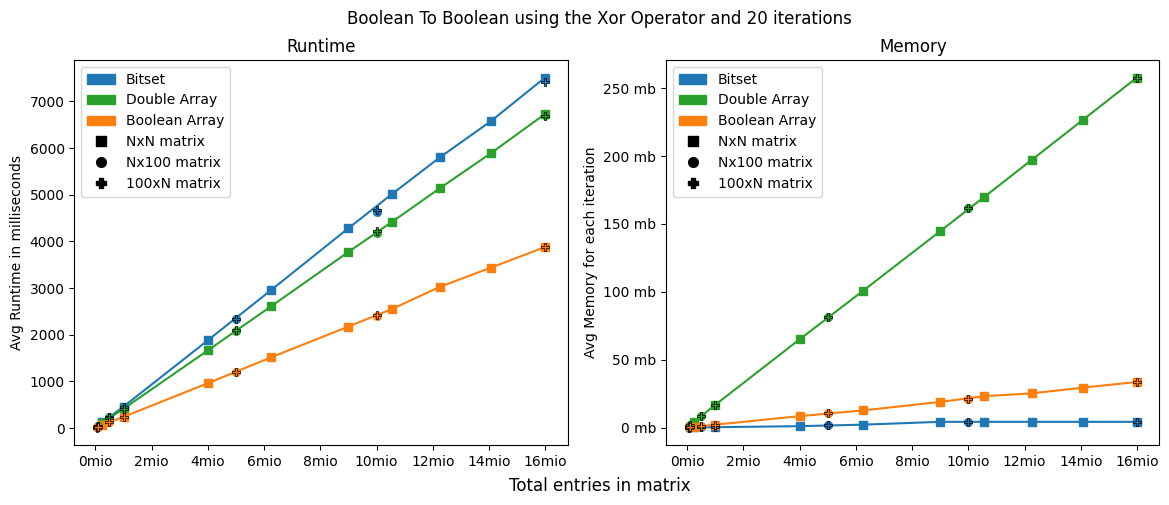

In [8]:
#plot bool to bool singel plot

fig, (ax, ax_memory) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)


ax.plot(bitsetDF_square.numEntries, bitsetDF_square.value, marker='s', color='tab:blue', label='Bitset', zorder=0)
ax.plot(fp64DF_square.numEntries, fp64DF_square.value, marker='s', color='tab:green', label='Double Array', zorder=0)
ax.plot(booleanDF_square.numEntries, booleanDF_square.value, marker='s', color='tab:orange', label='Boolean Array', zorder=0)

ax_memory.plot(memory_bitsetDF_square.numEntries, memory_bitsetDF_square.value, marker='s', color='tab:blue', label='Bitset')
ax_memory.plot(memory_fp64DF_square.numEntries, memory_fp64DF_square.value, marker='s', color='tab:green', label='Double Array')
ax_memory.plot(memory_booleanDF_square.numEntries, memory_booleanDF_square.value, marker='s', color='tab:orange', label='Boolean Array')


###
#100xN
###
ax.scatter(bitsetDF_rlen.numEntries, bitsetDF_rlen.value, marker='o', color='tab:blue', linewidth=0.5, label='100xN')
ax.scatter(fp64DF_rlen.numEntries, fp64DF_rlen.value, marker='o', color='tab:green', linewidth=0.5)
ax.scatter(booleanDF_rlen.numEntries, booleanDF_rlen.value, marker='o', color='tab:orange', linewidth=0.5)

ax_memory.scatter(memory_bitsetDF_rlen.numEntries, memory_bitsetDF_rlen.value, marker='o', color='tab:blue', linewidth=0.5, label='100xN')
ax_memory.scatter(memory_fp64DF_rlen.numEntries, memory_fp64DF_rlen.value, marker='o', color='tab:green', linewidth=0.5)
ax_memory.scatter(memory_booleanDF_rlen.numEntries, memory_booleanDF_rlen.value, marker='o', color='tab:orange', linewidth=0.5)



###
#Nx100
###
ax.scatter(bitsetDF_clen.numEntries, bitsetDF_clen.value, marker='P', color='tab:blue', linewidth=0.5, edgecolors='k',label='Nx100')
ax.scatter(fp64DF_clen.numEntries, fp64DF_clen.value, marker='P', color='tab:green', linewidth=0.5, edgecolors='k')
ax.scatter(booleanDF_clen.numEntries, booleanDF_clen.value, marker='P', color='tab:orange', linewidth=0.5, edgecolors='k')

ax_memory.scatter(memory_bitsetDF_clen.numEntries, memory_bitsetDF_clen.value, marker='P', color='tab:blue', linewidth=0.5, edgecolors='k',label='Nx100', zorder=10)
ax_memory.scatter(memory_fp64DF_clen.numEntries, memory_fp64DF_clen.value, marker='P', color='tab:green', linewidth=0.5, edgecolors='k', zorder=10)
ax_memory.scatter(memory_booleanDF_clen.numEntries, memory_booleanDF_clen.value, marker='P', color='tab:orange', linewidth=0.5, edgecolors='k', zorder=10)



ax.xaxis.set_major_formatter(lambda x, pos: "{x:.0f}mio".format(x=(x/1_000_000)))
ax.yaxis.set_major_formatter(lambda x, pos: "{x:.0f}".format(x=(x/1000)))
ax.set_ylabel('Avg Runtime in milliseconds')

ax_memory.xaxis.set_major_formatter(lambda x, pos: "{x:.0f}mio".format(x=(x/1_000_000)))
ax_memory.yaxis.set_major_formatter(lambda x, pos: "{x:.0f} mb".format(x=(x/1_000_000)))
ax_memory.set_ylabel('Avg Memory for each iteration')

ax.set_title('Runtime')
ax_memory.set_title('Memory')

fig.supxlabel('Total entries in matrix')
fig.suptitle("Boolean To Boolean using the Xor Operator and 20 iterations")


blue_patch = mpatches.Patch(color='tab:blue', label='Bitset')
green_patch = mpatches.Patch(color='tab:green', label='Double Array')
orange_patch = mpatches.Patch(color='tab:orange', label='Boolean Array')

square = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=7, label='NxN matrix')
rlen = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=7, label='Nx100 matrix')
clen = mlines.Line2D([], [], color='k', marker='P', linestyle='None',
                          markersize=7, label='100xN matrix')
ax.legend(handles=[blue_patch,green_patch,orange_patch,square,rlen,clen])
ax_memory.legend(handles=[blue_patch,green_patch,orange_patch,square,rlen,clen])

fig.savefig('matrix_operations_BoolToBool.svg')

In [9]:
memory_booleanDF_clen

,Matrix_rlen,Matrix_clen,output_type,operation,value_type,value,numEntries
119,100,500,BOOLEAN,BoolToBool,memory,100220.8,50000
131,100,1000,BOOLEAN,BoolToBool,memory,200214.4,100000
143,100,5000,BOOLEAN,BoolToBool,memory,1000220.8,500000
155,100,10000,BOOLEAN,BoolToBool,memory,2097334.4,1000000
167,100,50000,BOOLEAN,BoolToBool,memory,10485961.6,5000000
179,100,100000,BOOLEAN,BoolToBool,memory,20971728.0,10000000
191,100,160000,BOOLEAN,BoolToBool,memory,33554620.8,16000000
